In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("thisnwill not show")

In [2]:
df = pd.read_excel("Amazon_campaigns_EDA.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State                      123 non-null    object        
 1   Campaigns                  123 non-null    object        
 2   Type                       123 non-null    object        
 3   Targeting                  123 non-null    object        
 4   Campaign bidding strategy  108 non-null    object        
 5   Start date                 123 non-null    datetime64[ns]
 6   Budget(GBP)                123 non-null    float64       
 7   Impressions                123 non-null    int64         
 8   Clicks                     123 non-null    int64         
 9   CTR                        123 non-null    float64       
 10  Spend(GBP)                 123 non-null    float64       
 11  CPC(GBP)                   123 non-null    float64       
 12  Orders  

In [26]:
df

,State,Campaigns,Type,Targeting,Campaign bidding strategy,Start date,Budget(GBP),Impressions,Clicks,CTR,Spend(GBP),CPC(GBP),Orders,Sales(GBP),ACOS,ROAS,NTB orders,% of orders NTB,NTB sales(GBP),% of sales NTB
0,ENABLED,Marrakech,SP,MANUAL,Dynamic bids - down only,2021-10-06,200.0,18646539,115714,0.0062,34396.10,0.297251,2375,148426.55,0.2317,4.3152,0,0.0,0.00,0.0
1,ENABLED,rugs living room exact,SP,MANUAL,Dynamic bids - down only,2021-10-15,87.0,2062391,50909,0.0247,32747.50,0.643256,2674,80135.18,0.4087,2.4471,0,0.0,0.00,0.0
2,ENABLED,new shaggy auto,SP,AUTOMATIC,Dynamic bids - down only,2021-10-15,150.0,29102242,63746,0.0022,26749.31,0.419623,2934,91929.83,0.2910,3.4367,0,0.0,0.00,0.0
3,PAUSED,ECO Outdoor,SP,MANUAL,Dynamic bids - down only,2021-05-13,35.0,9527896,61027,0.0064,18933.45,0.310247,1835,102479.75,0.1848,5.4126,0,0.0,0.00,0.0
4,PAUSED,mynesShaggy,SP,MANUAL,Dynamic bids - down only,2019-02-18,40.0,15861805,71451,0.0045,17866.87,0.250058,1833,60927.89,0.2932,3.4101,0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,ENABLED,The Rugs brand - BLUE,SB2,MANUAL,NaN,2022-11-16,5.0,8290,40,0.0048,15.96,0.399000,4,102.04,0.1564,6.3935,4,1.0,102.04,1.0
119,PAUSED,Christmas Caimas,SP,MANUAL,Dynamic bids - down only,2021-02-12,22.0,3048,56,0.0184,15.20,0.271429,1,24.92,0.6100,1.6395,0,0.0,0.00,0.0
120,PAUSED,efes,SP,AUTOMATIC,Dynamic bids - up and down,2019-07-02,5.0,5932,19,0.0032,6.46,0.340000,0,0.00,0.0000,0.0000,0,0.0,0.00,0.0
121,PAUSED,Washable Brand,SB,MANUAL,NaN,2021-12-07,25.0,4739,14,0.0030,3.12,0.222857,0,0.00,0.0000,0.0000,0,0.0,0.00,0.0


In [5]:
df.Targeting.value_counts()

MANUAL       116
AUTOMATIC      7
Name: Targeting, dtype: int64

In [6]:
df.Campaigns.value_counts(dropna=False)

Marrakech                      1
trend                          1
2831 Video                     1
Xmas Caimas                    1
Outdoor New Brand              1
                              ..
Magic Video                    1
230 White                      1
rugs living room phrase all    1
Gustavo-bcf                    1
OUTDOOR                        1
Name: Campaigns, Length: 123, dtype: int64


<a href="#toc" aria-pressed="true" style="color:red; font-size:150%; ; font-family:newtimeroman; background-color:White" data-toggle="popover"> * Roas: Bu değer toplam satış değerininin reklam için yapılan harcamaya bölünmesiyle elde edilen bir değerdir. (total revenue / total spent) sonuc 4 ten ne kadar büyükse 
o kadar iyidir. 4 ün altı kötü olarak kabul edilir.

* CTR : impression / click değeridir. Bu değerin sınır değeri 0,005 üstü iyi olarak kabul edilir. 
* Tıklama oranı, belirli bir bağlantıya tıklayan kullanıcıların bir sayfayı, e-postayı veya reklamı görüntüleyen toplam kullanıcı sayısına oranıdır. Genellikle belirli bir web sitesi için çevrimiçi reklam kampanyasının başarısını ve e-posta kampanyalarının etkinliğini ölçmek için kullanılır

E-ticaret için iyi bir TO nedir?
Temel olarak, reklamınızı tıklayanların (tıklamalar) reklamınızı görüntüleyenlere (gösterimler) bölünmesiyle elde edilen orandır. İyi bir tıklama oranının ne olduğuna gelince, ortalama değer arama için %1,91 ve görüntülü reklam için %0,35 civarındadır.

Amazon'daki ortalama TO yaklaşık %0,4'tür. Bu, çoğunluğu Ürün Sayfalarında yer alan tüm reklam yerleşimlerini içerir. Yaklaşık %0,5 ve üzeri, iyi bir TO olarak kabul edilebilir.

* ACOS: total spend/total revenue değeridir. 0 a nekadar yakın ise o kadar iyidir.

* CPC : Cost per Click</a> 



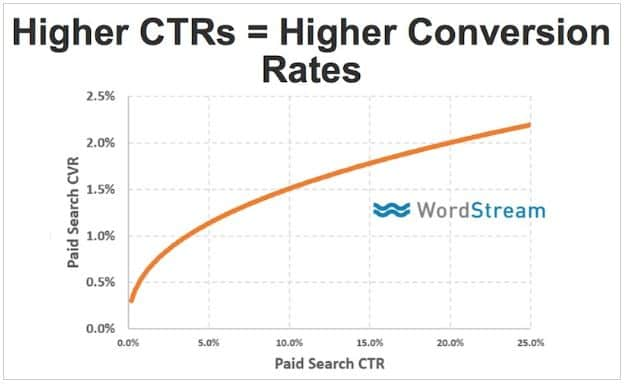

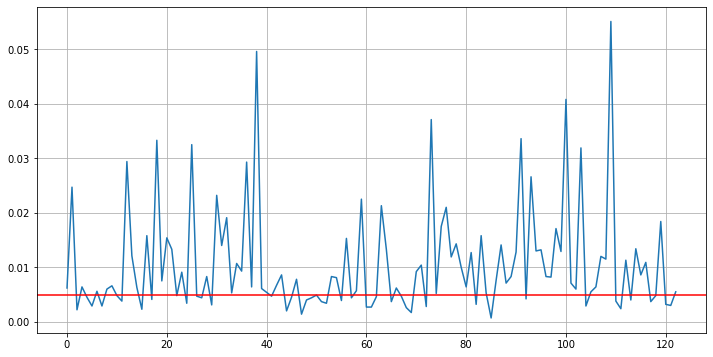

In [7]:
plt.figure(figsize=(12,6))
df.CTR.plot(kind="line", grid=True )
plt.axhline(y=0.005, color="red");

In [29]:
print(f"Amazon'daki ortalama TO yaklaşık %0,4'tür. Bu, çoğunluğu ürün \nsayfalarında yer alan tüm reklam yerleşimlerini içerir.\n\
yaklaşık %0,5 ve üzeri, iyi bir TO olarak kabul edilebilir.\nbizim datamızın %{round(((df[df.CTR>=0.005].CTR.count()/df.CTR.count())*100),2)}'ü bu değeri sağlamaktadır.")

Amazon'daki ortalama TO yaklaşık %0,4'tür. Bu, çoğunluğu ürün 
sayfalarında yer alan tüm reklam yerleşimlerini içerir.
yaklaşık %0,5 ve üzeri, iyi bir TO olarak kabul edilebilir.
bizim datamızın %65.04'ü bu değeri sağlamaktadır.


In [9]:
df.ROAS.describe().T

count    123.000000
mean       3.034772
std        1.774611
min        0.000000
25%        1.862900
50%        2.913400
75%        4.033150
max        8.120300
Name: ROAS, dtype: float64

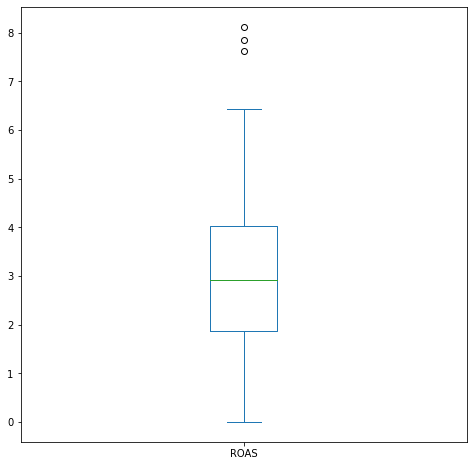

In [10]:
plt.figure(figsize=(8,8))
df.ROAS.plot(kind="box");

In [11]:
q3 =  np.percentile(df["ROAS"] , 75)
q1 =  np.percentile(df["ROAS"] , 25)
iqr = q3 - q1
high_lim = q3 + (1.5 * iqr)
high_lim

7.288525

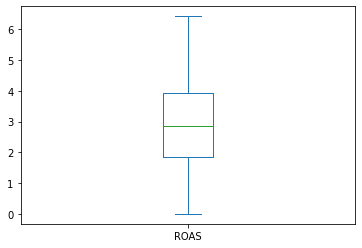

In [12]:
df[df.ROAS<high_lim].ROAS.plot(kind="box");

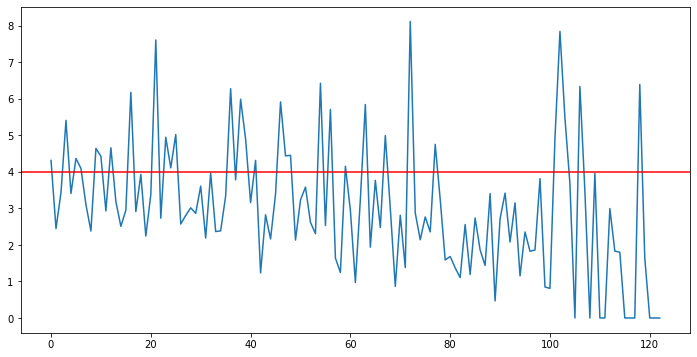

In [13]:
plt.figure(figsize=(12,6))
df.ROAS.plot(kind="line")
plt.axhline(y=4, color="red");

In [14]:
print(f"Roas değrinin kabul edilebilir oranı genel kanaatte\n\
%4 üstünün iyi altının kötü olduğu yönünde. Bizim verimizde bu oranı sağlayan\n\
verilerin oranı sadece %{round(((df[df.ROAS>4].ROAS.count()/df.ROAS.count())*100),2)} dir.\n\
Bu da verilen reklamların satışa yansımadığını gösterir.")

Roas değrinin kabul edilebilir oranı genel kanaatte
%4 üstünün iyi altının kötü olduğu yönünde. Bizim verimizde bu oranı sağlayan
verilerin oranı sadece %25.2 dir.
Bu da verilen reklamların satışa yansımadığını gösterir.


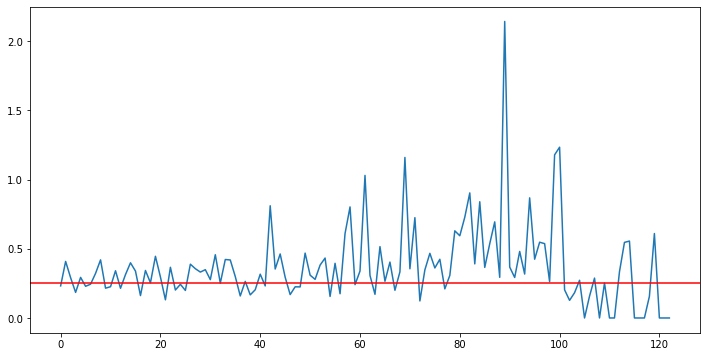

In [15]:
plt.figure(figsize=(12,6))
df.ACOS.plot(kind="line")
plt.axhline(y=0.25, color="red");

In [32]:
print(f"ACOS değrinin kabul edilebilir oranı genel kanaatte\n\
0.25 altının iyi üstünün kötü olduğu yönünde. Bizim verimizde bu oranı sağlayan\n\
verilerin oranı sadece %{round(((df[df.ACOS<0.25].ACOS.count()/df.ACOS.count())*100),2)} dir.\n\
Bu da verilen reklamların satışa yansımadığını gösterir.")

ACOS değrinin kabul edilebilir oranı genel kanaatte
0.25 altının iyi üstünün kötü olduğu yönünde. Bizim verimizde bu oranı sağlayan
verilerin oranı sadece %33.33 dir.
Bu da verilen reklamların satışa yansımadığını gösterir.


<AxesSubplot:>

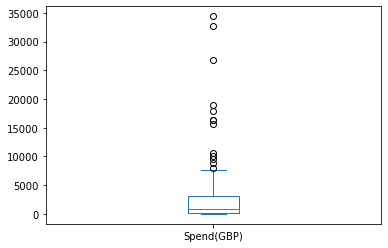

In [16]:
df["Spend(GBP)"].plot(kind="box")

In [17]:
q3 =  np.percentile(df["Spend(GBP)"] , 75)
q1 =  np.percentile(df["Spend(GBP)"] , 25)
iqr = q3 - q1
high_lim = q3 + (1.5 * iqr)
high_lim

7594.570000000001

In [18]:
df["Spend(GBP)"].describe().T

count      123.000000
mean      3040.654553
std       5928.205331
min          0.580000
25%         98.445000
50%        815.590000
75%       3096.895000
max      34396.100000
Name: Spend(GBP), dtype: float64

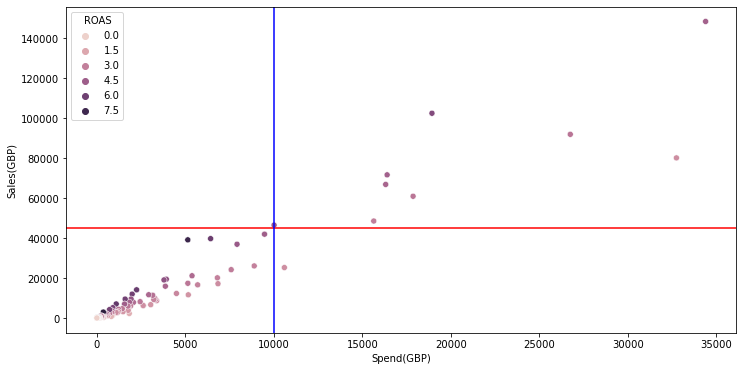

In [33]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["Spend(GBP)"], y=df['Sales(GBP)'], hue=df.ROAS)
plt.axhline(y=45000, color="red")
plt.axvline(x=10000, color="blue");
#ROAS değerini yorumlarken koyu renklerin baskın olduğu yerlerde reklamların satışa etkisi anlamlı iken, renklerin açık olduğu bölgelerde reklamların getirisi düşük 
#kalmıştır. Örneğin Roas 7.5 olduğu yerde 1 pound reklam maliyeti varken 7.5 pound revenue getirmiştir.(~5000 cost'a katlanılırken ~40000 pound revenue elde edilmiştir)
#Grafikte açık renklerin baskınlığı reklam politikasının doğru olmadığını göstermektedir.

<AxesSubplot:>

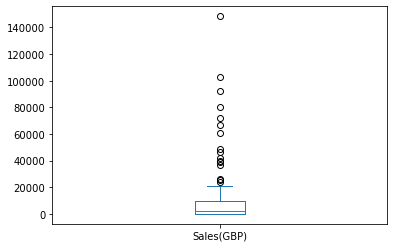

In [20]:
df['Sales(GBP)'].plot(kind="box")

<AxesSubplot:>

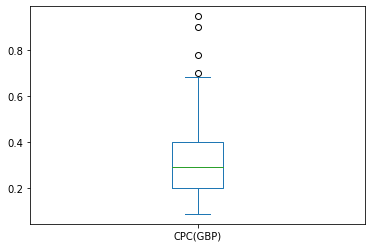

In [21]:
df["CPC(GBP)"].plot(kind="box")

In [22]:
q3 =  np.percentile(df["CPC(GBP)"] , 75)
q1 =  np.percentile(df["CPC(GBP)"] , 25)
iqr = q3 - q1
high_lim = q3 + (1.5 * iqr)
high_lim

0.6974906067353187

In [38]:
df[df["CPC(GBP)"]>0.65].groupby(["Spend(GBP)"])['Sales(GBP)'].sum()

Spend(GBP)
1156.78     2672.31
2614.41     6238.29
3041.78     6657.60
3377.15     8689.14
5165.91    11597.03
Name: Sales(GBP), dtype: float64

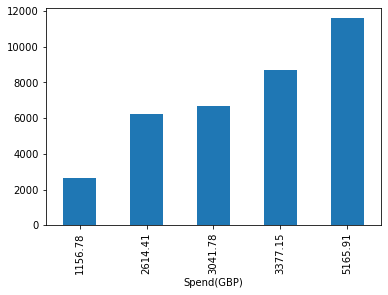

In [40]:
(df[df["CPC(GBP)"]>0.65].groupby(["Spend(GBP)"])['Sales(GBP)'].sum()).plot(kind="bar");
#Cost per click 0.65'ten büyük iken reklam maliyetleri ve getirdiği satış miktarlarına bakıldığında reklamların satışa etkisinin istenen düzeyde olmadığı görülmektedir.
#Örneğin 5165 pound reklam maliyetine katlanan şirket, yalnızca 11597 pound revenue elde edebilmiştir.

In [24]:
df[df["CPC(GBP)"]<0.2].groupby(["Spend(GBP)"])['Sales(GBP)'].sum()

Spend(GBP)
0.58           0.00
26.85         48.32
27.75         83.16
35.70        141.34
39.80          0.00
40.69        141.26
47.06        369.40
54.45        207.83
93.80        108.08
93.88        295.90
100.95       345.14
243.00       790.46
243.34      1157.09
252.30       594.88
291.60       806.86
365.19      2965.46
719.01      2340.34
858.15      3565.63
1085.64     2749.26
1220.60     3194.86
1597.71     9453.92
1768.15     3824.11
1836.54     7925.59
1903.92     6017.66
1933.32     9477.09
3869.25    15905.73
4496.03    12278.83
5693.57    16587.41
Name: Sales(GBP), dtype: float64

In [25]:
df.columns

Index(['State', 'Campaigns', 'Type', 'Targeting', 'Campaign bidding strategy',
       'Start date', 'Budget(GBP)', 'Impressions', 'Clicks', 'CTR',
       'Spend(GBP)', 'CPC(GBP)', 'Orders', 'Sales(GBP)', 'ACOS', 'ROAS',
       'NTB orders', '% of orders NTB', 'NTB sales(GBP)', '% of sales NTB'],
      dtype='object')